In [ ]:
import numpy as np

a = np.array([5,1,5,3,4,5,6,7,8,9])
a
type(a)
[5,1,5,3,4,5,6,7,8,9] == 5
(a == 5).astype(int)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
import numpy as np
a = np.array([0,1,2,3,4,5,6,7,8,9])
print(type(a))
print(a==5)
a_bin = (a==5).astype(int)
print(a_bin)

<class 'numpy.ndarray'>
[False False False False False  True False False False False]
[0 0 0 0 0 1 0 0 0 0]


In [ ]:
# https://keras.io/api/datasets/mnist/
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


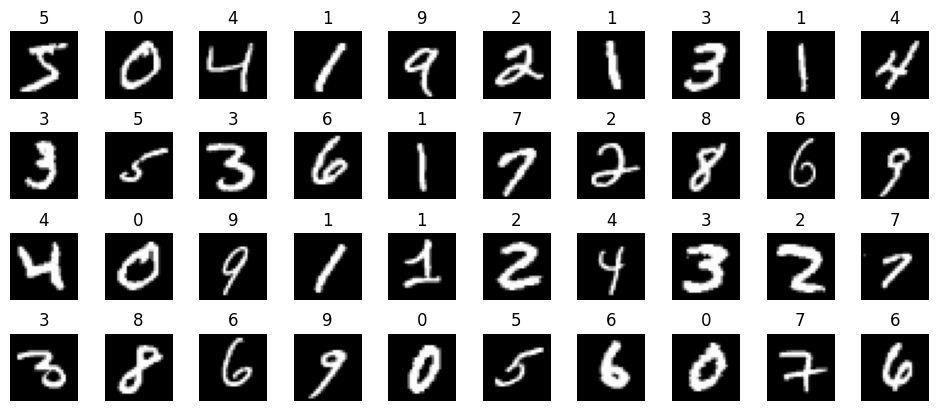

In [ ]:
import matplotlib.pyplot as plt

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="gray")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
a = np.array([5,1,5,5,2,1,6,5,8])
idx = np.where(a==5)
print(idx)
np.random.choice(idx[0], size=2, replace=False)

(array([0, 2, 3, 7]),)


array([2, 3])

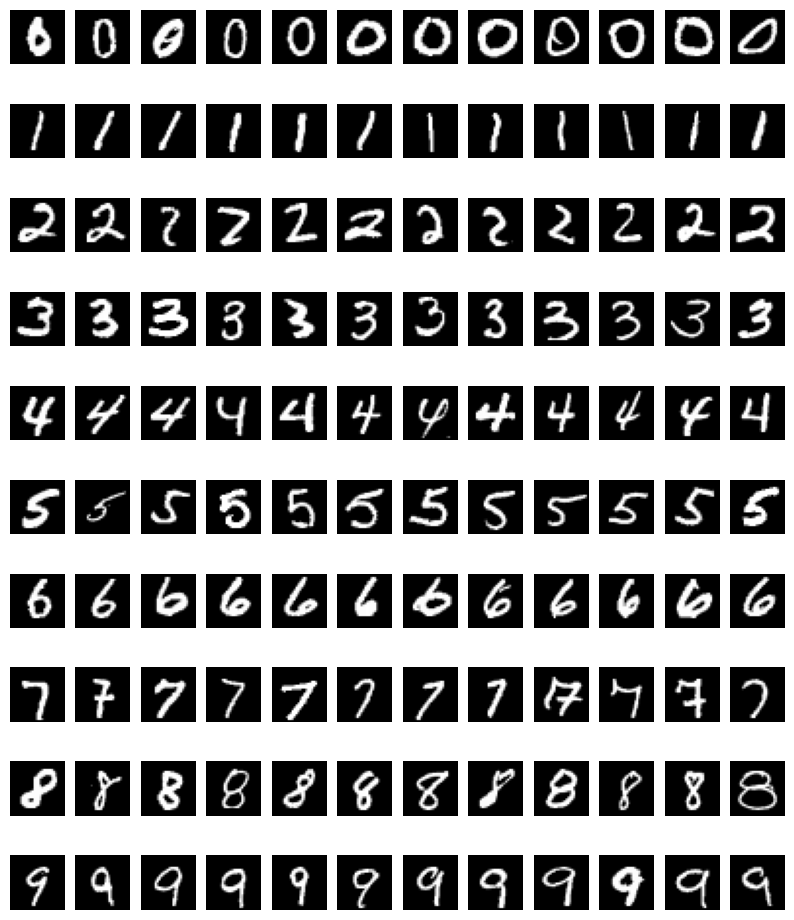

In [ ]:
n_rows = 10
n_cols = 12

plt.figure(figsize=(n_rows,n_cols))
for i in range(n_rows):
  index = np.where(y_train == i)[0]
  index = np.random.choice(index, n_cols, False)
  for j in range(n_cols):
    plt.subplot(n_rows,n_cols,n_cols*i+j+1)
    plt.imshow(x_train[index[j],:,:], cmap='gray')
    plt.axis('off')

plt.show()

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train_binary = (y_train == 5).astype(int)
y_test_binary = (y_test == 5).astype(int)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1) #activation='linear'
])

print(model.summary())

model.compile(loss='binary_crossentropy', metrics=['accuracy'])
#test_loss, test_accuracy = model.evaluate(x_test, y_test_binary)
model.fit(x_train, y_train_binary, epochs=4, batch_size=2048, validation_split=0.98)

print('Test:')
test_loss, test_accuracy = model.evaluate(x_test, y_test_binary)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/4
1/1 [==============================] - 1s 1s/step - loss: 11.6469 - accuracy: 0.2350 - val_loss: 9.8529 - val_accuracy: 0.3522
Epoch 2/4
1/1 [==============================] - 0s 199ms/step - loss: 10.2388 - accuracy: 0.3275 - val_loss: 6.0798 - val_accuracy: 0.5999
Epoch 3/4
1/1 [==============================] - 0s 201ms/step - loss: 6.6696 - accuracy: 0.5625 - val_loss: 5.2945 - val_accuracy: 0.6518
E

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import Zeros

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1, kernel_initializer=Zeros(), bias_initializer=Zeros())
])
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

print('Test:')
test_loss, test_accuracy = model.evaluate(x_test, y_test_binary)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 785       
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Test:
313/313 [==============================] - 0s 998us/step - loss: 1.3759 - accuracy: 0.9108
